Dr. Marques' Introduction to Data Science guest talk - Fall 2020

Step 1 - the initial notebook

This notebook is not wrong, but it's not a good notebook

**What can be improved**

1. Describe what the notebook is attempting to do
1. Organize into sections to make it easier to follow
1. Add EDA (exploratory data analysis) - What data do we have? Can we trust the data?
1. Make data clean-up more explicit
1. Explain what the code blocks are doing
1. Explain why certain numbers were chosen (what assumptions are behind them)
1. Make the graphs easier to read
1. Make the code more flexible with constants
1. Make the code more difficult to break
1. Describe limitations of the conclusion

-----------------

In [1]:
import pandas as pd
salaries = pd.read_csv('data/salaries.csv')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
salaries = salaries[salaries.earn >= 14500]
salaries = salaries[salaries.age < 66]
salaries = salaries[salaries.ed >= 12]

Now that the dataset is cleaned up, we need to check if both genders are similarly represented. A gender-skewed dataset is still useful for the analysis, but makes it more difficult.

In [3]:
print('The dataset has {} female and {} male samples'.format(
   len(salaries[salaries.sex == 'female']),
   len(salaries[salaries.sex == 'male'])))

The dataset has 342 female and 341 male samples


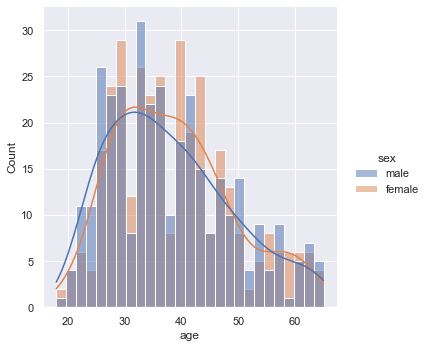

In [4]:
sns.displot(salaries, x='age',  hue='sex', bins='sqrt', kde=True)

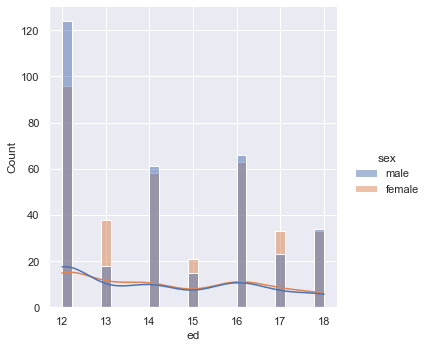

In [5]:
sns.displot(salaries, x='ed',  hue='sex', bins='sqrt', kde=True)

We will start with an overview of the relationships among the features (columns), split by sex.

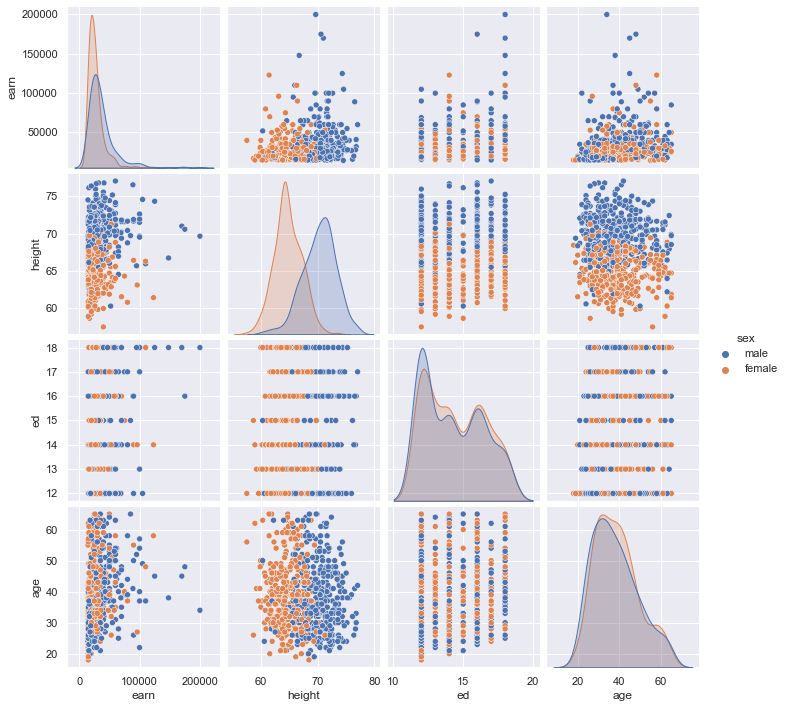

In [6]:
sns.pairplot(salaries, hue='sex')

In [7]:
salaries.groupby(['sex', 'race']).size().unstack()

race    black  hispanic  other  white
sex                                  
female     36        17      8    281
male       25        19      7    290

# Analyzing experience

<AxesSubplot:xlabel='age', ylabel='earn'>

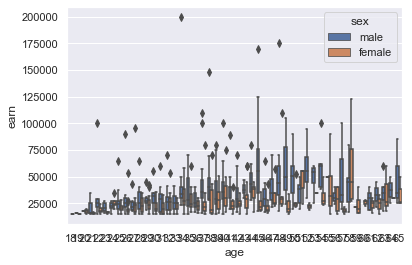

In [8]:
sns.boxplot(data=salaries, x='age', y='earn', hue='sex')

This plot shows that females earn less on average. More importantly, females earn less in all quartiles and have fewer outliers in the fourth quartile (the higher end of salaries).

# Analyzing education level

<AxesSubplot:xlabel='ed', ylabel='earn'>

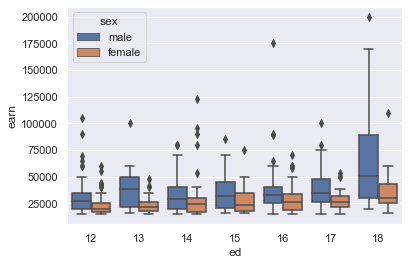

In [9]:
sns.boxplot(data=salaries, x='ed', y='earn', hue='sex')

This plot also shows that females earn less than males on average, and again the quartiles are lower for females.

# Excluding low salaries

In [10]:
salaries.earn.describe()

count       683.000000
mean      31867.506589
std       20239.320668
min       14500.000000
25%       20000.000000
50%       26000.000000
75%       35000.000000
max      200000.000000
Name: earn, dtype: float64

<AxesSubplot:xlabel='age', ylabel='earn'>

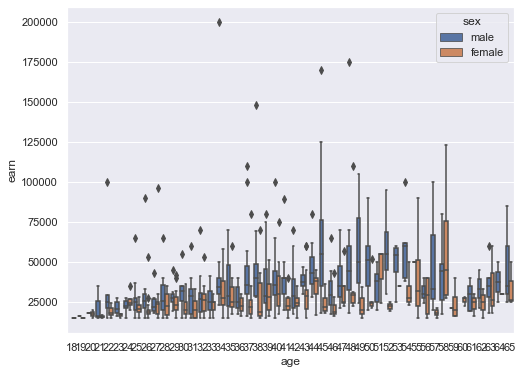

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=salaries[salaries.earn >= 14500], x='age', y='earn', hue='sex')

<AxesSubplot:xlabel='ed', ylabel='earn'>

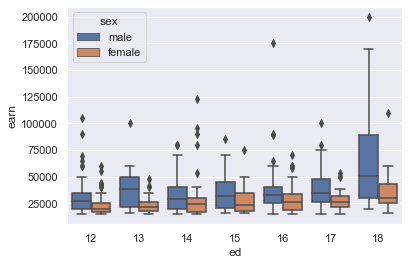

In [12]:
sns.boxplot(data=salaries[salaries.earn >= 14500], x='ed', y='earn', hue='sex')

After we exclude the lower salaries, we end up with the same picture: females are paid less on average and in general.

# Conclusions

We collected enough evidence to point to potential gender discrimination in salaries at this company:

- For the same age level, females make less on average and in general (all quartiles).
- For the same education level, females again make less on average and in general.